In [1]:
import os
import joblib
import numpy as np
import pandas as pd
from scipy import stats
import pingouin as pg

In [2]:
os.getcwd()

'C:\\Users\\hdsce\\Documents\\PythonDataAnalysis2\\live'

In [3]:
os.chdir('../data')

In [4]:
os.listdir()

['Used_Cars_Price.csv', 'Used_Cars_Price.xlsx', 'Used_Cars_Price.z']

In [5]:
df = joblib.load('Used_Cars_Price.z')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1268 non-null   int64 
 1   Age        1268 non-null   int64 
 2   KM         1268 non-null   int64 
 3   FuelType   1268 non-null   object
 4   HP         1268 non-null   int64 
 5   MetColor   1268 non-null   object
 6   Automatic  1268 non-null   object
 7   CC         1268 non-null   int64 
 8   Doors      1268 non-null   int64 
 9   Weight     1268 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 99.2+ KB


In [7]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [8]:
df['Age'].cov(df['Price'])

-22157.692905818418

In [11]:
df.cov(numeric_only = True).round(2)

,Price,Age,KM,HP,CC,Doors,Weight
Price,4117236.37,-22157.69,-3.744107e+07,5899.69,18808.75,317.01,15155.22
Age,-22157.69,187.94,1.711871e+05,-7.99,-213.61,-1.18,-98.23
KM,-37441074.77,171187.12,1.285820e+09,-155996.12,2557934.81,595.87,359258.46
HP,5899.69,-7.99,-1.559961e+05,171.61,-46.69,1.50,-39.09
CC,18808.75,-213.61,2.557935e+06,-46.69,33730.00,23.85,5001.29
Doors,317.01,-1.18,5.958700e+02,1.50,23.85,0.90,13.21
Weight,15155.22,-98.23,3.592585e+05,-39.09,5001.29,13.21,1145.08


In [12]:
df['Age'].corr(df['Price'])

-0.7965447290519272

In [13]:
df.corr(numeric_only = True)

,Price,Age,KM,HP,CC,Doors,Weight
Price,1.000000,-0.796545,-0.514583,0.221951,0.050472,0.164706,0.220720
Age,-0.796545,1.000000,0.348233,-0.044492,-0.084839,-0.090810,-0.211737
KM,-0.514583,0.348233,1.000000,-0.332090,0.388411,0.017519,0.296073
HP,0.221951,-0.044492,-0.332090,1.000000,-0.019405,0.120436,-0.088183
CC,0.050472,-0.084839,0.388411,-0.019405,1.000000,0.136929,0.804742
Doors,0.164706,-0.090810,0.017519,0.120436,0.136929,1.000000,0.411593
Weight,0.220720,-0.211737,0.296073,-0.088183,0.804742,0.411593,1.000000


In [14]:
pg.corr(x = df['Age'], y = df['Price'])

,n,r,CI95%,p-val,BF10,power
pearson,1268,-0.796545,"[-0.82, -0.78]",5.879611e-279,6.169e+274,1.0


In [ ]:
# KM, HP, CC, Doors, Weight

In [15]:
x = df['Age']

In [18]:
corr = lambda x: pg.corr(x = x, y = df['Price'])['p-val']

In [19]:
corr(x = df['Age'])

pearson    5.879611e-279
Name: p-val, dtype: float64

In [20]:
df1 = df.select_dtypes(include = [int, float])
df1.head()

,Price,Age,KM,HP,CC,Doors,Weight
0,13500,23,46986,90,2000,3,1165
1,13750,23,72937,90,2000,3,1165
2,13950,24,41711,90,2000,3,1165
3,14950,26,48000,90,2000,3,1165
4,13750,30,38500,90,2000,3,1170


In [21]:
df1.apply(func = corr, axis = 0)

,Price,Age,KM,HP,CC,Doors,Weight
pearson,0.0,5.879611e-279,1.187373e-86,1.289468e-15,0.072396,3.644964e-09,1.863429e-15


In [22]:
df1.apply(func = corr, axis = 0).lt(0.05)

,Price,Age,KM,HP,CC,Doors,Weight
pearson,True,True,True,True,False,True,True


In [23]:
pg.normality(data = df, dv = 'Price', group = 'MetColor')

,W,pval,normal
MetColor,,,
1,0.974759,7.077313e-11,False
0,0.988073,1.429560e-03,False


In [24]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'MetColor')

,W,pval,equal_var
levene,5.761315,0.016526,False


In [25]:
sp1 = df.loc[df['MetColor'].eq('0'), 'Price']
sp2 = df.loc[df['MetColor'].eq('1'), 'Price']

In [28]:
sp1.mean()

9466.672897196262

In [29]:
sp2.mean()

9814.132142857143

In [30]:
pg.ttest(x = sp1, y = sp2, correction = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.983633,935.893141,two-sided,0.002922,"[-576.0, -118.92]",0.171735,5.313,0.82371


In [31]:
pg.ttest(x = sp1, y = sp2, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.891752,1266,two-sided,0.003896,"[-583.18, -111.73]",0.171735,4.077,0.82371


In [32]:
pg.mwu(x = sp1, y = sp2)

,U-val,alternative,p-val,RBC,CLES
MWU,166376.0,two-sided,0.029849,0.074455,0.462773


In [33]:
pg.normality(data = df, dv = 'Price', group = 'Automatic')

,W,pval,normal
Automatic,,,
0,0.981458,2.977123e-11,False
1,0.948419,5.997743e-03,False


In [34]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'Automatic')

,W,pval,equal_var
levene,1.092962,0.296015,True


In [35]:
sp1 = df.loc[df['Automatic'].eq('0'), 'Price']
sp2 = df.loc[df['Automatic'].eq('1'), 'Price']

In [36]:
sp1.mean()

9676.575125208681

In [37]:
sp2.mean()

10043.857142857143

In [38]:
pg.ttest(x = sp1, y = sp2, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.472702,1266,two-sided,0.14108,"[-856.55, 121.99]",0.181091,0.377,0.312941


In [39]:
df['Automatic'].value_counts()

Automatic
0    1198
1      70
Name: count, dtype: int64

In [40]:
pg.mwu(x = sp1, y = sp2)

,U-val,alternative,p-val,RBC,CLES
MWU,37216.5,two-sided,0.113249,0.112414,0.443793


In [41]:
df2 = pd.read_csv('https://bit.ly/sample_ttest')

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      30 non-null     int64  
 1   before  30 non-null     float64
 2   after   30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [43]:
df2.head()

,id,before,after
0,1,88.409617,89.047771
1,2,84.740057,83.796276
2,3,106.925242,105.782969
3,4,93.276659,89.965632
4,5,104.575636,103.410691


In [44]:
df2.describe()

,id,before,after
count,30.000000,30.000000,30.000000
mean,15.500000,86.331409,85.325118
std,8.803408,9.918105,9.779472
min,1.000000,67.503561,65.462936
25%,8.250000,80.123625,79.998144
50%,15.500000,86.617928,86.149042
75%,22.750000,91.690221,90.259867
max,30.000000,106.925242,105.782969


In [45]:
from GraphicSetting import *

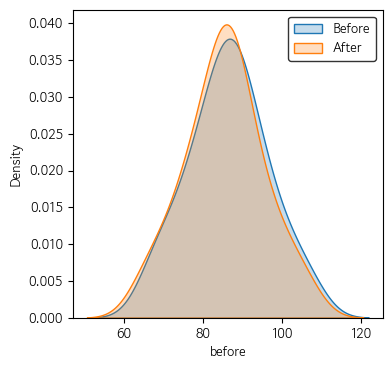

In [50]:
sns.kdeplot(data = df2, x = 'before', fill = True, label = 'Before')
sns.kdeplot(data = df2, x = 'after', fill = True, label = 'After')
plt.legend(loc = 'best');

In [51]:
stats.shapiro(df2['before'])

ShapiroResult(statistic=0.9858832359313965, pvalue=0.9512473940849304)

In [52]:
stats.shapiro(df2['before'])[1]

0.9512473940849304

In [53]:
pg.ttest(x = df2['before'], y = 90)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.025961,29,two-sided,0.052056,"[82.63, 90.03]",0.369888,1.159,0.499536


In [54]:
pg.ttest(x = df2['before'], y = 90, alternative = 'less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.025961,29,less,0.026028,"[-inf, 89.41]",0.369888,2.318,0.63062


In [55]:
df2.apply(func = lambda x: stats.shapiro(x)[1])

id        0.266230
before    0.951247
after     0.939600
dtype: float64

In [57]:
pg.ttest(x = df2['before'], y = df2['after'], paired = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.53666,29,two-sided,0.000006,"[0.63, 1.38]",0.102172,3529.131,0.084186


In [58]:
pg.ttest(x = df2['before'], y = df2['after'], paired = True, alternative = 'greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.53666,29,greater,0.000003,"[0.7, inf]",0.102172,7058.261,0.136056


In [62]:
df3 = df2.melt(id_vars = 'id')
df3.head()

,id,variable,value
0,1,before,88.409617
1,2,before,84.740057
2,3,before,106.925242
3,4,before,93.276659
4,5,before,104.575636


In [63]:
pg.normality(data = df3, dv = 'value', group = 'variable')

,W,pval,normal
variable,,,
before,0.985883,0.951247,True
after,0.985143,0.939600,True


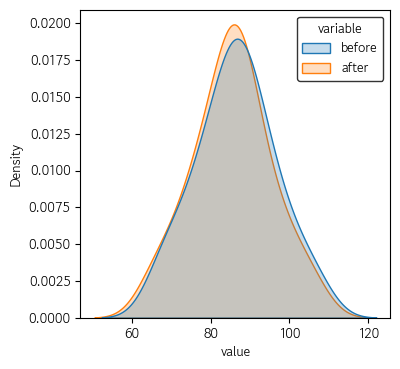

In [65]:
sns.kdeplot(data = df3, x = 'value', hue = 'variable', fill = True);

In [66]:
pg.normality(data = df, dv = 'Price', group = 'FuelType')

,W,pval,normal
FuelType,,,
Diesel,0.955971,4.250351e-04,False
Petrol,0.978165,5.503549e-12,False
CNG,0.952408,4.957061e-01,True


In [67]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'FuelType')

,W,pval,equal_var
levene,6.497893,0.001557,False


In [69]:
pg.anova(data = df, dv = 'Price', between = 'FuelType')

,Source,ddof1,ddof2,F,p-unc,np2
0,FuelType,2,1265,3.982748,0.018869,0.006257


In [70]:
pg.welch_anova(data = df, dv = 'Price', between = 'FuelType')

,Source,ddof1,ddof2,F,p-unc,np2
0,FuelType,2,38.941548,2.611953,0.086207,0.006257


In [78]:
pg.kruskal(data = df, dv = 'Price', between = 'FuelType')

,Source,ddof1,H,p-unc
Kruskal,FuelType,2,10.47472,0.005314


In [71]:
df['FuelType'].value_counts()

FuelType
Petrol    1125
Diesel     126
CNG         17
Name: count, dtype: int64

In [72]:
df3 = df[df['FuelType'].ne('CNG')]

In [73]:
pg.homoscedasticity(data = df3, dv = 'Price', group = 'FuelType')

,W,pval,equal_var
levene,12.369755,0.000452,False


In [74]:
sp1 = df3.loc[df3['FuelType'].eq('Diesel'), 'Price']
sp2 = df3.loc[df3['FuelType'].eq('Petrol'), 'Price']

In [75]:
pg.ttest(x = sp1, y = sp2, correction = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.251554,142.011762,two-sided,0.025886,"[-987.54, -64.17]",0.260628,1.21,0.791665


In [76]:
import hds_stats as hds

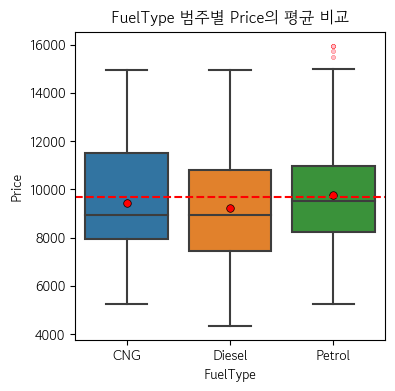

In [77]:
hds.plot.box_group(data = df, x = 'FuelType', y = 'Price')

In [79]:
import scikit_posthocs as sp

In [80]:
sp.posthoc_tukey(a = df, val_col = 'Price', group_col = 'FuelType')

,Diesel,Petrol,CNG
Diesel,1.000000,0.015915,0.900000
Petrol,0.015915,1.000000,0.759308
CNG,0.900000,0.759308,1.000000


In [81]:
sp.posthoc_tamhane(a = df, val_col = 'Price', group_col = 'FuelType')

,Diesel,Petrol,CNG
Diesel,1.000000,0.075664,0.987404
Petrol,0.075664,1.000000,0.931849
CNG,0.987404,0.931849,1.000000


In [82]:
df4 = pd.read_csv('https://bit.ly/sample_cross')

In [83]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Coupon    1000 non-null   object
 1   Purchase  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [84]:
df4.head()

,Coupon,Purchase
0,발송함,구매안함
1,발송안함,구매안함
2,발송함,구매안함
3,발송안함,구매안함
4,발송함,구매안함


In [86]:
df4.describe()

,Coupon,Purchase
count,1000,1000
unique,2,2
top,발송함,구매안함
freq,500,900


In [91]:
pd.crosstab(
    index = df4['Coupon'], 
    columns = df4['Purchase'], 
    normalize = 'index', 
    margins = True, 
    margins_name = '합계'
)

Purchase,구매안함,구매함
Coupon,,
발송안함,0.98,0.02
발송함,0.82,0.18
합계,0.90,0.10


In [93]:
test = pg.chi2_independence(data = df4, x = 'Coupon', y = 'Purchase')

In [94]:
test[2]

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,69.344444,1.0,8.268520e-17,0.263333,1.0
1,cressie-read,0.666667,71.114172,1.0,3.371396e-17,0.266672,1.0
2,log-likelihood,0.000000,78.386370,1.0,8.473481e-19,0.279976,1.0
3,freeman-tukey,-0.500000,88.484655,1.0,5.123076e-21,0.297464,1.0
4,mod-log-likelihood,-1.000000,104.804510,1.0,1.348002e-24,0.323735,1.0
5,neyman,-2.000000,173.016488,1.0,1.623187e-39,0.415953,1.0


In [95]:
from statsmodels.stats.proportion import proportions_ztest

In [96]:
proportions_ztest(count = 30, nobs = 1000, value = 0.02)

(1.8537599944001615, 0.0637735042703906)

In [97]:
proportions_ztest(count = [30, 45], nobs = [1000, 1500], value = 0.0)

(0.0, 1.0)

In [100]:
proportions_ztest(count = [30, 50], nobs = [1000, 1000], value = 0.0)

(-2.2821773229381925, 0.022478873366125248)

In [101]:
df = df.drop(columns = ['CC', 'Automatic'])

In [102]:
df = df[df['FuelType'].ne('CNG')]

In [103]:
df = df.reset_index(drop = True)

In [104]:
joblib.dump(value = df, filename = 'Used_Cars_Price_Prep.z')

['Used_Cars_Price_Prep.z']